In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

In [2]:
wine=pd.read_csv("C:\\Users\\kanis\\Documents\\Assignment\\Assignments data\\PCA\\wine.csv")

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
winea=wine.drop(['Type'],axis=1)

In [11]:
winea

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
x=winea.values
xscaled=MinMaxScaler().fit_transform(winea)

In [16]:
xscaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [26]:
wine1=pd.DataFrame(xscaled)

In [27]:
wine1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [28]:
pca=PCA()
pca_values=pca.fit_transform(wine1)

In [36]:
pd.DataFrame(pca_values)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,-0.009818,-0.003105,-0.050829,0.043147,0.033437,-0.019795
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,0.047284,-0.047386,-0.081414,-0.050335,0.051438,-0.032272
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,-0.037139,-0.001465,0.073544,0.131167,0.111606,0.038913
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,-0.024662,0.011399,0.196597,0.030275,0.057329,0.011031


In [31]:
var = pca.explained_variance_ratio_

In [37]:
pd.DataFrame(var)

,0
0,0.407495
1,0.189704
2,0.085617
3,0.074267
4,0.055653
5,0.046588
6,0.036639
7,0.024088
8,0.022744
9,0.022510


In [42]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)

In [38]:
pd.DataFrame(var1)

,0
0,40.75
1,59.72
2,68.28
3,75.71
4,81.28
5,85.94
6,89.60
7,92.01
8,94.28
9,96.53


In [39]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
1,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
2,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968
3,-0.040328,0.486032,-0.241976,-0.081694,0.015880,-0.052643,-0.027033,-0.709095,0.076574,-0.026322,-0.352498,0.082062,-0.229793
4,-0.278010,-0.412890,0.286394,0.418305,0.470899,-0.018030,0.002573,-0.360038,0.148666,0.200582,-0.077162,-0.263396,-0.076556
5,-0.137254,-0.213103,-0.300965,-0.135610,-0.312519,0.283604,0.147045,0.197232,0.503115,0.388032,-0.283041,-0.167278,-0.276349
6,-0.275352,0.310302,-0.171805,-0.297556,0.520419,-0.066524,-0.050698,0.214889,0.466207,-0.212596,0.193315,-0.224561,0.188372
7,0.555031,-0.076928,-0.123460,0.270756,-0.019937,-0.413384,-0.156461,-0.034232,0.483470,-0.036924,0.295372,0.102303,-0.260229
8,0.326687,-0.014471,-0.044362,-0.204924,0.471910,0.351232,0.088960,0.122889,-0.284054,-0.023708,0.068775,-0.060197,-0.624839
9,-0.035912,-0.237073,-0.056899,-0.132503,0.325868,-0.263006,-0.199445,0.236775,0.018743,0.039143,-0.534248,0.602194,0.023829


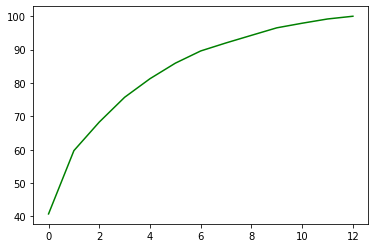

In [41]:
plt.plot(var1, color = "green")

In [51]:
a=pca_values[:,0:1]
b=pca_values[:,1:2]
c=pca_values[:,2:3]

In [56]:
import seaborn as sns

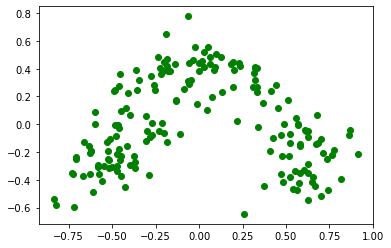

In [57]:
plt.scatter(a,b,color='green')

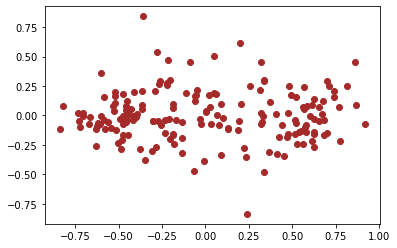

In [59]:
plt.scatter(a,c,color='brown')

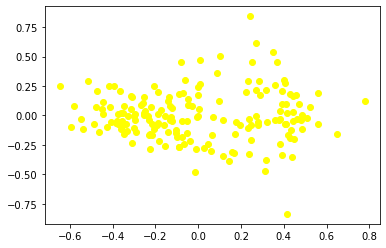

In [60]:
plt.scatter(b,c,color='yellow')

In [61]:
pcadf=pd.DataFrame(pca_values[:,0:3],columns=['p1','p2','p3'])

In [62]:
pcadf

,p1,p2,p3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


In [63]:
winedf=pd.concat([pcadf,wine.Type],axis=1)

In [64]:
winedf

,p1,p2,p3,Type
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
...,...,...,...,...
173,0.739510,-0.471901,0.209360,3
174,0.581781,-0.348366,0.083590,3
175,0.626313,-0.546857,-0.030495,3
176,0.572991,-0.425516,-0.094537,3


In [65]:
#performing clustering

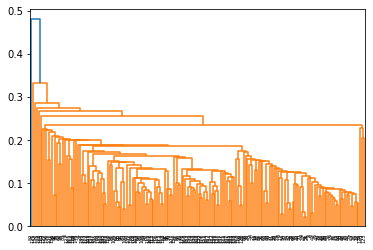

In [67]:
dend1 = sch.dendrogram(sch.linkage(pcadf, method = "single"))

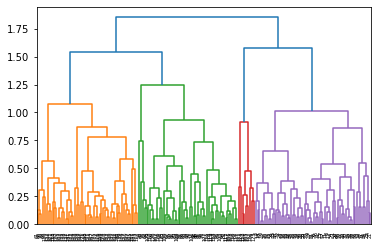

In [68]:
dend2 = sch.dendrogram(sch.linkage(pcadf, method = "complete"))

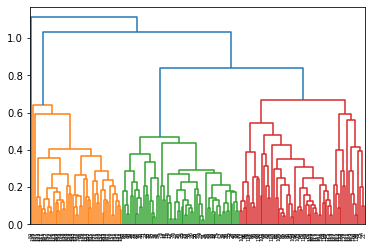

In [69]:
dend3 = sch.dendrogram(sch.linkage(pcadf, method = "average"))

In [70]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "complete")
yhc = hc.fit_predict(pcadf)

In [71]:
cl = pd.DataFrame(yhc, columns = ["clusters"])
cl

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,3
174,3
175,3
176,3


In [73]:
winedf["Clusters"] = pd.Series(yhc)
winedf

,p1,p2,p3,Type,Clusters
0,-0.706336,-0.253193,0.024093,1,0
1,-0.484977,-0.008823,-0.280482,1,0
2,-0.521172,-0.189187,0.196217,1,0
3,-0.821644,-0.580906,0.081110,1,0
4,-0.202546,-0.059467,0.300240,1,0
...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,3,3
174,0.581781,-0.348366,0.083590,3,3
175,0.626313,-0.546857,-0.030495,3,3
176,0.572991,-0.425516,-0.094537,3,3


In [80]:
result1 = winedf.iloc[:,0:3].groupby(winedf.Clusters).mean()
result1

,p1,p2,p3
Clusters,,,
0,-0.485404,-0.198350,-0.000034
1,-0.039203,0.400022,-0.007924
2,0.091377,0.276421,0.469319
3,0.627249,-0.293867,0.074932
4,-0.063516,0.270953,-0.479283
5,0.507277,-0.037721,-0.199635


In [81]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(pcadf)
kmeans.labels_

array([0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 2, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 4, 2,
       2, 2, 3, 2, 3, 5, 4, 5, 2, 4, 2, 4, 2, 5, 2, 2, 4, 1, 2, 2, 4, 4,
       4, 4, 4, 4, 3, 2, 2, 0, 4, 2, 2, 5, 2, 2, 5, 4, 2, 4, 4, 4, 4, 5,
       5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1])

In [84]:
pd.DataFrame(kmeans.labels_)

,0
0,0
1,0
2,0
3,0
4,5
...,...
173,1
174,1
175,1
176,1


In [85]:
k = list(range(2,10))

TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pcadf)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(pcadf.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,pcadf.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS


[array([72.54736478]),
 array([52.05998114]),
 array([48.4628534]),
 array([44.73314876]),
 array([41.5717652]),
 array([39.41914549]),
 array([37.39620373]),
 array([36.14458143])]

([<matplotlib.axis.XTick at 0x20b45118d60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

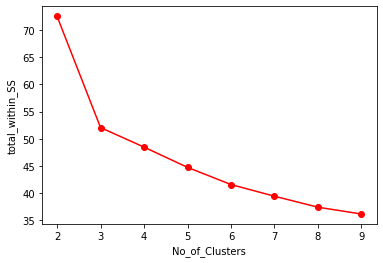

In [86]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [88]:
kmeans1 = KMeans(n_clusters = 5)
kmeans1.fit(pcadf)
kmeans1.labels_
yhc1 = kmeans1.labels_
winedf["Clusters-K"] = pd.Series(yhc1)
winedf


,p1,p2,p3,Type,Clusters,Clusters-K
0,-0.706336,-0.253193,0.024093,1,0,4
1,-0.484977,-0.008823,-0.280482,1,0,2
2,-0.521172,-0.189187,0.196217,1,0,4
3,-0.821644,-0.580906,0.081110,1,0,4
4,-0.202546,-0.059467,0.300240,1,0,2
...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,3,3,1
174,0.581781,-0.348366,0.083590,3,3,1
175,0.626313,-0.546857,-0.030495,3,3,1
176,0.572991,-0.425516,-0.094537,3,3,1
